In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch


In [2]:
with open("train_data.json") as f:
    data = json.load(f)
data.keys()


dict_keys(['24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90'])

In [21]:
data_inverse = {}

for dataset in data.keys():
    for i, x in enumerate(data[dataset]["x_first"]):  
        config = "".join([str(hp) for hp in x[0]])
        
        if config not in data_inverse:
            data_inverse[config] = {"X": [], "y_val":[], "dataset_name":[]}
        
        data_inverse[config]["X"].append(data[dataset]["meta_feat"])
        #data_inverse[config]["y_val"].append(x[2]/(x[1]+1e-10))
        data_inverse[config]["y_val"].append(x[2])
        data_inverse[config]["dataset_name"].append(dataset)

In [22]:
train_data = {}
val_data = {}
total_conf = len(data_inverse.keys())
split = int(total_conf*0.8)
for i, key in enumerate(data_inverse.keys()):
    if i<split:
        train_data[key] = data_inverse[key]
    else:
        val_data[key] = data_inverse[key]
    data_inverse[key]["y_val"] = (np.array(data_inverse[key]["y_val"])/max(data_inverse[key]["y_val"])).tolist()

In [23]:
train_data

{'0.00.2': {'X': [[0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.6923076923076923,
    0.3434343434343435,
    0.6666666666666665,
    0.3333333333333333,
    0.5155723351923641,
    0.5521377126219542,
    0.41168438407153046,
    0.0,
    0.0,
    1.0],
   [0.0,
    1.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.3076923076923077,
    0.6161616161616162,
    0.2222222222222222,
    0.5555555555555556,
    0.11921414617852769,
    0.44644225366501505,
    0.6907764977191581,
    1.0,
    1.0,
    1.0],
   [0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    1.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1.0,
    0.0,
    0.0,
    0.3076923076923077,
    0.6262626262626264,
    0.5555555555555556,
    0.0,
    0.3555573549804144,
    0.4053123563365173,
  

In [37]:
from code_submission.fsbo import MLP, FSBO
device = "cpu"
feature_extractor = MLP(27, n_hidden=10, n_layers=3,
             use_cnn =False).to(device)      
conf = {"kernel":"52", 
"nu":2.5, 
"ard":None, 
"device": "cpu", 
"context_size": 50, 
"lr":0.005, 
"loss_tol": 0.5,
"use_perf_hist": False}

fsbo_model = FSBO(data_inverse, val_data, feature_extractor=feature_extractor , conf=conf).to(device)
loss = fsbo_model.train(epochs=15, n_batches=1000)
print(loss)

0.40447627753019333
-0.29612066224217415
-1.0559296905994415
-1.683916687965393
-1.9367945790290833
-1.9343798756599426
-1.8381218314170837
-1.8723198175430298
-1.9269326627254486
-1.7988333106040955


/home/sebastian/anaconda3/envs/pytorch18/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:83: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


-1.8467731475830078


/home/sebastian/anaconda3/envs/pytorch18/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:83: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


-1.9272512197494507


/home/sebastian/anaconda3/envs/pytorch18/lib/python3.8/site-packages/gpytorch/utils/cholesky.py:83: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(f"A not p.d., added jitter of {jitter_new:.1e} to the diagonal", NumericalWarning)


-1.9041695594787598
Matrix not positive definite after repeatedly adding jitter up to 1.0e-04. Original error on first attempt: cholesky_cpu: U(49,49) is zero, singular U.
Matrix not positive definite after repeatedly adding jitter up to 1.0e-04. Original error on first attempt: cholesky_cpu: U(49,49) is zero, singular U.
-2.109452337026596
Matrix not positive definite after repeatedly adding jitter up to 1.0e-04. Original error on first attempt: cholesky_cpu: U(50,50) is zero, singular U.
Matrix not positive definite after repeatedly adding jitter up to 1.0e-04. Original error on first attempt: cholesky_cpu: U(49,49) is zero, singular U.
Matrix not positive definite after repeatedly adding jitter up to 1.0e-04. Original error on first attempt: cholesky_cpu: U(49,49) is zero, singular U.
Matrix not positive definite after repeatedly adding jitter up to 1.0e-04. Original error on first attempt: cholesky_cpu: U(49,49) is zero, singular U.
Matrix not positive definite after repeatedly add

In [38]:
meta_feat = torch.FloatTensor(data_inverse[config]["X"])
emd = feature_extractor(meta_feat)

In [39]:
emd = emd.detach().cpu().numpy()

In [40]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(emd)

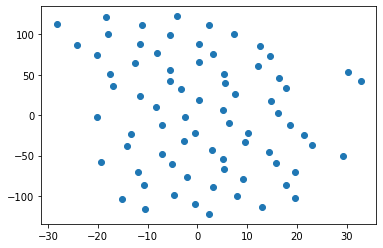

In [41]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

NameError: name 'c' is not defined

24
[12.   0.2]
6
25
[42.    0.82]
1
26
[52.   0.8]
0
27
[4.  0.1]
2
28
[1.   0.06]
17
29
[0.  0.1]
1
3
[4.   0.15]
1
30
[53.    0.79]
11
31
[7.   0.37]
15
32
[59.    0.71]
0
33
[0.   0.02]
10
34
[3.   0.06]
15
35
[11.    0.26]
8
36
[1.   0.11]
12
37
[0.   0.06]
13
38
[6.   0.25]
15
39
[10.    0.39]
0
4
[35.    0.61]
0
40
[1.   0.08]
10
41
[10.    0.38]
6
42
[4.   0.43]
13
43
[2.   0.07]
19
44
[45.    0.64]
5
45
[4.   0.12]
0
46
[27.    0.51]
11
47
[0.   0.35]
16
48
[1.   0.13]
0
49
[1.   0.05]
15
5
[49.    0.71]
11
50
[0.   0.01]
13
51
[3.  0.4]
2
52
[2.   0.04]
1
53
[5.   0.32]
8
54
[0.   0.05]
18
55
[3.   0.11]
15
56
[0.   0.03]
1
57
[17.    0.47]
0
58
[58.    0.67]
4
59
[3.   0.18]
15
6
[5.  0.5]
10
60
[1.   0.02]
6
61
[13.    0.33]
7
62
[38.    0.91]
17
63
[17.    0.52]
8
64
[4.   0.23]
11
65
[32.    0.45]
1
66
[41.    0.81]
5
67
[1.   0.03]
18
68
[20.    0.27]
1
69
[1.   0.02]
13
7
[4.   0.06]
15
70
[0.   0.09]
18
71
[24.    0.56]
11
72
[3.   0.04]
2
73
[1.   0.02]
14
74
[23.   0.

<ipython-input-44-032ce53ee2ec>:7: RuntimeWarning: divide by zero encountered in true_divide
  c = b[:,1]/(b[:,0]/+1e-5)
<ipython-input-44-032ce53ee2ec>:7: RuntimeWarning: invalid value encountered in true_divide
  c = b[:,1]/(b[:,0]/+1e-5)


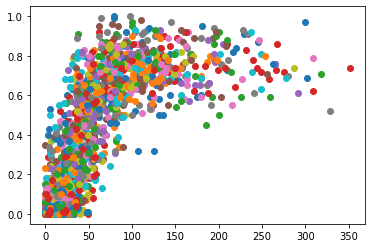

In [44]:

for task in data.keys():
    b = np.array([x[1:] for x in data[task]["x_first"]])
    plt.scatter(b[:,0], b[:,1])
    
    b = np.array([x[1:] for x in data[task]["x_first"]])

    c = b[:,1]/(b[:,0]/+1e-5)
    i = np.nanargmax(c)
    print(task)
    print(b[i,:])
    print(i)

In [46]:
def get_info(x):
    task = x[:2]
    meta_features = x[2:-2]
    
    return task, meta_features
task, meta_features = get_info(data["24"]["X"][0])

In [61]:
data_inverse = {}
for dataset in data.keys():
    for i, x in enumerate(data[dataset]["X"]):
        if x[-2] ==1:
            task, meta_features = get_info(x)
            task = "".join([str(a) for a in task])

            if task not in data_inverse.keys():
                data_inverse[task] = {"X": [], "y": []}
            else:
                data_inverse[task]["X"].append(meta_features)
                data_inverse[task]["y"].append(data[dataset]["y_val"][i])
    

In [65]:
for task in data_inverse.keys():
    df = pd.DataFrame(data_inverse[task]["X"])
    df["y"] = data_inverse[task]["y"]
    a=pd.DataFrame.drop_duplicates(df)
    
    data_inverse[task]["y"]

In [66]:
a

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,y
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.343434,0.666667,0.333333,0.515572,0.552138,0.411684,0.0,0.0,1.0,0.79
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.616162,0.222222,0.555556,0.119214,0.446442,0.690776,1.0,1.0,1.0,0.69
10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.626263,0.555556,0.000000,0.355557,0.405312,0.287538,0.0,0.0,0.0,0.71
11,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.626263,0.555556,0.000000,0.355557,0.405312,0.287538,0.0,0.0,0.0,0.75
12,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.626263,0.555556,0.000000,0.355557,0.405312,0.287538,0.0,0.0,0.0,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.030303,0.111111,0.222222,0.731085,0.514308,0.743029,1.0,1.0,1.0,0.77
458,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.030303,0.111111,0.222222,0.731085,0.514308,0.743029,1.0,1.0,1.0,0.79
465,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.121212,0.666667,0.444444,0.482464,0.225142,0.026601,1.0,0.0,1.0,0.00
466,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.121212,0.666667,0.444444,0.482464,0.225142,0.026601,1.0,0.0,1.0,0.50


In [14]:
for dataset in data.keys():
    print(dataset)
    print(np.unique(np.array(data[dataset]["perf_hist"])[:,1,:], axis=0))

24
[[0.006 0.84 ]
 [0.007 0.84 ]
 [0.008 0.84 ]
 [0.012 0.84 ]
 [0.013 0.84 ]
 [0.027 0.84 ]
 [0.032 0.84 ]
 [0.04  0.84 ]
 [0.055 0.84 ]
 [0.076 0.84 ]
 [0.093 0.84 ]
 [0.096 0.84 ]
 [0.118 0.84 ]
 [0.131 0.84 ]
 [0.144 0.84 ]
 [0.151 0.84 ]
 [0.175 0.84 ]
 [0.229 0.84 ]]
25
[[0.012 0.52 ]
 [0.024 0.52 ]
 [0.036 0.52 ]
 [0.048 0.52 ]
 [0.056 0.52 ]
 [0.058 0.52 ]
 [0.066 0.52 ]
 [0.07  0.52 ]
 [0.08  0.52 ]
 [0.084 0.52 ]
 [0.092 0.52 ]
 [0.1   0.52 ]
 [0.158 0.52 ]
 [0.164 0.52 ]
 [0.166 0.52 ]
 [0.17  0.52 ]
 [0.19  0.52 ]
 [0.204 0.52 ]
 [0.276 0.52 ]
 [0.388 0.52 ]]
26
[[0.002 0.8  ]
 [0.004 0.8  ]
 [0.026 0.8  ]
 [0.034 0.8  ]
 [0.07  0.8  ]
 [0.076 0.8  ]
 [0.078 0.8  ]
 [0.082 0.8  ]
 [0.09  0.8  ]
 [0.104 0.8  ]
 [0.122 0.8  ]
 [0.126 0.8  ]
 [0.13  0.8  ]
 [0.156 0.8  ]
 [0.158 0.8  ]
 [0.164 0.8  ]
 [0.2   0.8  ]
 [0.4   0.8  ]]
27
[[0.03 0.73]
 [0.04 0.73]
 [0.1  0.73]
 [0.11 0.73]
 [0.17 0.73]
 [0.26 0.73]
 [0.32 0.73]
 [0.35 0.73]
 [0.42 0.73]
 [0.46 0.73]
 [0.55 0.73]
 [

[[0.01833333 0.        ]
 [0.02       0.        ]
 [0.02666667 0.        ]
 [0.03833333 0.        ]
 [0.04666667 0.        ]
 [0.05333333 0.        ]
 [0.06       0.        ]
 [0.06166667 0.        ]
 [0.095      0.        ]
 [0.10833333 0.        ]
 [0.13833333 0.        ]
 [0.14       0.        ]
 [0.15       0.        ]
 [0.15666667 0.        ]
 [0.17333333 0.        ]
 [0.395      0.        ]]
88
[[0.00285714 0.36      ]
 [0.01       0.36      ]
 [0.01142857 0.36      ]
 [0.01714286 0.36      ]
 [0.01857143 0.36      ]
 [0.02428571 0.36      ]
 [0.02571429 0.36      ]
 [0.02857143 0.36      ]
 [0.03       0.36      ]
 [0.03857143 0.36      ]
 [0.04571429 0.36      ]
 [0.05428571 0.36      ]
 [0.06857143 0.36      ]
 [0.07285714 0.36      ]
 [0.08857143 0.36      ]
 [0.11714286 0.36      ]
 [0.16857143 0.36      ]
 [0.37571429 0.36      ]]
89
[[0.01       0.58      ]
 [0.02666667 0.58      ]
 [0.03       0.58      ]
 [0.03333333 0.58      ]
 [0.04166667 0.58      ]
 [0.055      0.58

In [31]:
np.array(data[dataset]["perf_hist"])

(719, 11, 2)

In [43]:
np.array(data[dataset]["perf_hist"])[:,1,:]

array([[0.00666667, 0.17      ],
       [0.00666667, 0.17      ],
       [0.00666667, 0.17      ],
       ...,
       [0.0025    , 0.17      ],
       [0.0025    , 0.17      ],
       [0.0025    , 0.17      ]])

In [17]:
with open("time_data.json") as f:
    data = json.load(f)

In [19]:
X = np.array(data["X"])
y = np.array(data["y"])



In [42]:
X[X[:,-2]==1]

array([[0.    , 0.2   , 0.    , ..., 1.    , 1.    , 0.096 ],
       [1.    , 0.8   , 0.    , ..., 1.    , 1.    , 0.151 ],
       [0.    , 1.    , 0.    , ..., 1.    , 1.    , 0.131 ],
       ...,
       [0.    , 0.8   , 0.    , ..., 1.    , 1.    , 0.025 ],
       [0.    , 0.7   , 0.    , ..., 1.    , 1.    , 0.0575],
       [1.    , 0.7   , 0.    , ..., 1.    , 1.    , 0.0825]])

In [40]:
a.append(3)
b

[1, [1, 2, 3]]

In [83]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [84]:
model = RFR(max_depth=50)

In [85]:
model.fit(X,y)

RandomForestRegressor(max_depth=50)

In [86]:
model.score(X,y)

0.8526855654163464

In [87]:
y_pred = model.predict(X)

In [88]:
y_pred

array([73.84, 48.59, 44.67, ..., 99.2 , 68.91, 82.03])

In [89]:
y

array([ 96.,  33.,  42., ..., 133.,  74.,  98.])

In [52]:
len(X[0])

29

In [55]:
import matplotlib.pyplot as plt

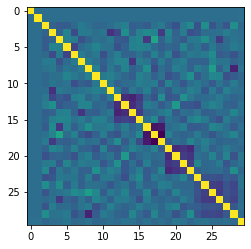

In [56]:
plt.imshow(a)

In [59]:
a[-1,:]

array([ 0.00613864,  0.01710718, -0.04063716, -0.00876795,  0.0050582 ,
        0.04035751, -0.03008667, -0.01052037,  0.03001696, -0.03378931,
       -0.02318995,  0.00570647, -0.01698416,  0.0281674 ,  0.02171547,
       -0.0382115 ,  0.02128719, -0.0238107 ,  0.00417481, -0.03823597,
        0.0551289 ,  0.03297397, -0.04335907,  0.02358226,  0.03471666,
       -0.01896834, -0.01105266,  0.01208483, -0.03368593,  1.        ])

In [3]:
with open("data_best_time.json") as f:
    data = json.load(f)

In [7]:
data.keys()

dict_keys(['24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90'])

In [50]:
import torch

task = "24"
tensor_builder = []

for x in data[task]["perf_hist"]:
    tensor_builder.append([])
    for i, (x_i, y_i) in enumerate(zip(x[0], x[1])):
        tensor_builder[-1].append([x_i, y_i])
    
    for j in range(i,9):
        tensor_builder[-1].append([0,0])

x =torch.FloatTensor(tensor_builder).transpose(2,1)
x.shape

torch.Size([20, 2, 10])

In [44]:
from torch import nn
m = nn.Conv1d(in_channels=2, out_channels=8,kernel_size= 3, stride=1, padding = (1))

In [45]:
x = m(x).flatten(start_dim=1)

In [46]:
help(m)

torch.Size([20, 8, 10])

In [47]:
mm = nn.MaxPool1d(3, stride=1)
mm(x).shape

torch.Size([20, 8, 8])